# Yelp Review Analysis

Author: Ruixuan Zhao

In [1]:
# import 
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import os

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive"

os.chdir(path)
os.listdir(path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


['Colab Notebooks',
 'STAT628_module2.gslides',
 'Yelp_Review',
 '回归分析方法及其在实验研究与设计中的应用.gslides']

## 1. Read CSV and Raw Data Analysis

In [0]:
# read data
review = pd.read_csv("Yelp_Review/mexican_review.csv")
info = pd.read_csv("Yelp_Review/mexican_info.csv")
tip = pd.read_csv("Yelp_Review/mexican_tip.csv")

In [3]:
# number of review
n_review = len(review)
print(n_review)

401693


In [4]:
# drop NA
#review = review.dropna(axis = 0)
text = review["text"]

print(len(review))

401693


In [5]:
info[:5]

,business_id,name,city,latitude,longitude,star,review_count
0,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,Phoenix,33.495194,-112.028588,3.0,18
1,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,Las Vegas,36.195615,-115.040529,4.5,184
2,NPHZkn1e-tSJAbo8Zm9rYw,Burrito Bandidos,Toronto,43.666181,-79.316468,3.5,43
3,voZnDQs6Hs3YpNcS-9TALg,New Mexican Grill,Chandler,33.261325,-111.790815,4.0,84
4,jScBTQtdAt-8RshaiBEHgw,Served,Henderson,36.010745,-115.064803,4.5,664


In [6]:
tip[:5]

,text,date,compliment_count,business_id,user_id
0,Good chips and salsa. Loud at times. Good serv...,2011-12-26 01:46:17,0,5KheTjYPu1HcQzQFtm4_vw,jRyO2V1pA4CdVVqCIOPc1Q
1,Hey mom look at me! I'm Nancy friggen' Kerrigan!!,2014-08-24 03:56:50,1,19umlhmVB9O3njIBfRAe8g,gtwM4ijo65AN4DvXdgCu_w
2,Yay hushpuppies!,2012-10-06 02:19:39,0,OjnRf8yDGEBCoUDdchSViw,tAw16nAiAcAm8V7H1dQ2eg
3,Worst. Mexican. Ever.,2010-03-13 20:52:19,0,FgPANtTwZqXB-edLkZTXQg,Hc2tC2TDMD1wDjp8aCq7jA
4,Good Mexican food quick. Good prices and famil...,2015-01-11 22:10:08,0,gY95Q7BVB636-tAcDqC9Ww,SxcN4e5SKNhZ4wfEUbAMRA


**The relationship between length of reviews(characters) and stars**

In [7]:
length_review = []
for num in range(len(text)):
  try:
    result = len(text[num])
  except:
    error = num
    print(error)
  
  #length_review.append(result)

381650


In [8]:
error

381650

In [9]:
review[(error-1):(error+2)]

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
381649,W-J30MZhgZTVY-tcGPyKXw,XnKUcmayZd-N43fR2n-0Ew,ms7cmWkPiSBDTnz-1sv2kQ,2.0,2016-04-04 05:27:20,What The Heck happened to this restaurant?!?\n...,4,0,1
381650,iHdxK8lwkYn0rlNh-REuGQ,v3DIq18Z30KNwyUvBXtXEA,oXoVJ0xKv82cBo9U6oEjlQ,3.0,2014-12-26 08:32:06,NaN,0,0,0
381651,ObR7JyxlY0yfCdsQRlflCQ,0Ng_q87TK7ZDs3XktDOtwQ,qjO0FtFXalKSVZLVq-XewQ,2.0,2018-04-20 14:05:07,Their posted opening times do not seem to be a...,0,0,0


In [10]:
review2 = review.drop(index = [error])
review2[381649:381651]

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
381649,W-J30MZhgZTVY-tcGPyKXw,XnKUcmayZd-N43fR2n-0Ew,ms7cmWkPiSBDTnz-1sv2kQ,2.0,2016-04-04 05:27:20,What The Heck happened to this restaurant?!?\n...,4,0,1
381651,ObR7JyxlY0yfCdsQRlflCQ,0Ng_q87TK7ZDs3XktDOtwQ,qjO0FtFXalKSVZLVq-XewQ,2.0,2018-04-20 14:05:07,Their posted opening times do not seem to be a...,0,0,0


In [11]:
text2 = review2["text"]
text2[381649:381651]

381649    What The Heck happened to this restaurant?!?\n...
381651    Their posted opening times do not seem to be a...
Name: text, dtype: object

In [12]:
n_review2=len(review2)
print(n_review2)

401692


In [0]:
length_review = []
for words in text2:
  try:
    result = len(words)
    length_review.append(result)
  except:
    print(words)

In [14]:
review2[381649:381652]

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
381649,W-J30MZhgZTVY-tcGPyKXw,XnKUcmayZd-N43fR2n-0Ew,ms7cmWkPiSBDTnz-1sv2kQ,2.0,2016-04-04 05:27:20,What The Heck happened to this restaurant?!?\n...,4,0,1
381651,ObR7JyxlY0yfCdsQRlflCQ,0Ng_q87TK7ZDs3XktDOtwQ,qjO0FtFXalKSVZLVq-XewQ,2.0,2018-04-20 14:05:07,Their posted opening times do not seem to be a...,0,0,0
381652,6nE7oSpGYsDoI3ame58RmQ,GSMrdk2iQDp4DtHMmoKadw,g-aAe8SqZlZTnN3oA8mNlw,1.0,2018-07-12 03:51:13,First of all I waited 5minutes in the drive th...,0,0,0


In [15]:
length_review[:5]

[2020, 155, 495, 235, 251]

In [16]:
stars = review2["stars"]
stars[:20]

0     3.0
1     5.0
2     5.0
3     2.0
4     5.0
5     5.0
6     5.0
7     5.0
8     4.0
9     3.0
10    5.0
11    5.0
12    5.0
13    3.0
14    5.0
15    4.0
16    5.0
17    5.0
18    1.0
19    4.0
Name: stars, dtype: float64

In [0]:
star1 = stars[stars==1.0].index.tolist()
star2 = stars[stars==2.0].index.tolist()
star3 = stars[stars==3.0].index.tolist()
star4 = stars[stars==4.0].index.tolist()
star5 = stars[stars==5.0].index.tolist()

text_s1 = text2[star1]
text_s2 = text2[star2]
text_s3 = text2[star3]
text_s4 = text2[star4]
text_s5 = text2[star5]

In [0]:
length_review1 = []
for words in text_s1:
  try:
    result = len(words)
    length_review1.append(result)
  except:
    print(words)

length_review2 = []
for words in text_s2:
  try:
    result = len(words)
    length_review2.append(result)
  except:
    print(words)

length_review3 = []
for words in text_s3:
  try:
    result = len(words)
    length_review3.append(result)
  except:
    print(words)

length_review4 = []
for words in text_s4:
  try:
    result = len(words)
    length_review4.append(result)
  except:
    print(words)

length_review5 = []
for words in text_s5:
  try:
    result = len(words)
    length_review5.append(result)
  except:
    print(words)

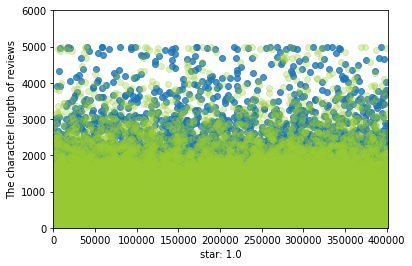

In [19]:
plt.xlabel('star: 1.0')
plt.ylabel('The character length of reviews')
plt.xlim(xmax=len(text2)+1,xmin=0)
plt.ylim(ymax=6000,ymin=0)
plt.scatter(star1,length_review1,alpha = 0.8)
#plt.scatter(star2,length_review2,alpha = 0.4,color = '#90EE90')
#plt.scatter(star3,length_review3,alpha = 0.3,color = '#9370DB')
#plt.scatter(star4,length_review4,alpha = 0.2,color = '#FFA500')
plt.scatter(star5,length_review5,alpha = 0.3,color =   '#9ACD32')
plt.show()

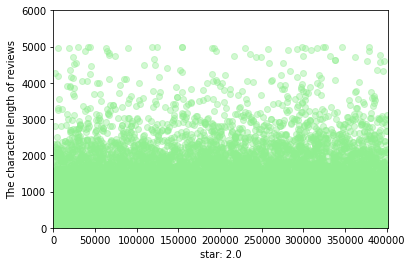

In [20]:
plt.xlabel('star: 2.0')
plt.ylabel('The character length of reviews')
plt.xlim(xmax=len(text2)+1,xmin=0)
plt.ylim(ymax=6000,ymin=0)
plt.scatter(star2,length_review2,alpha = 0.4,color = '#90EE90')
plt.show()

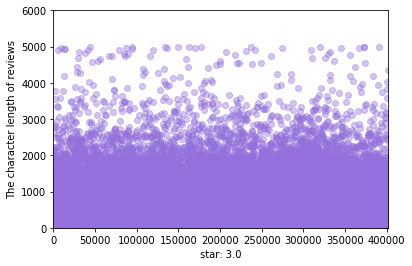

In [21]:
plt.xlabel('star: 3.0')
plt.ylabel('The character length of reviews')
plt.xlim(xmax=len(text2)+1,xmin=0)
plt.ylim(ymax=6000,ymin=0)
plt.scatter(star3,length_review3,alpha = 0.4,color = '#9370DB')
plt.show()

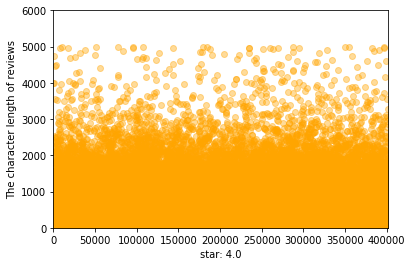

In [22]:
plt.xlabel('star: 4.0')
plt.ylabel('The character length of reviews')
plt.xlim(xmax=len(text2)+1,xmin=0)
plt.ylim(ymax=6000,ymin=0)
plt.scatter(star4,length_review4,alpha = 0.4,color = '#FFA500')
plt.show()

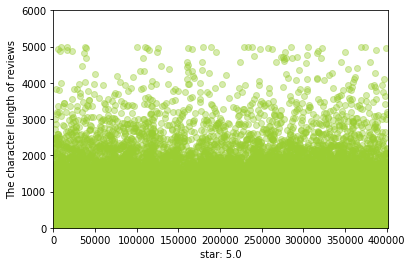

In [23]:
plt.xlabel('star: 5.0')
plt.ylabel('The character length of reviews')
plt.xlim(xmax=len(text2)+1,xmin=0)
plt.ylim(ymax=6000,ymin=0)
plt.scatter(star5,length_review5,alpha = 0.4,color = '#9ACD32')
plt.show()

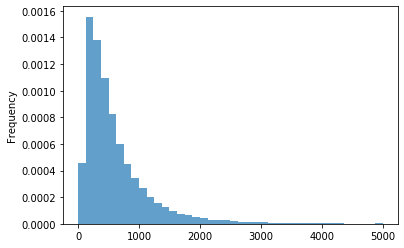

In [24]:
plt.xlabel('')
plt.ylabel('Frequency')
#plt.xlim(xmax=len(text2)+1,xmin=0)
#plt.ylim(ymax=50000,ymin=0)
plt.hist(length_review1, bins=40,alpha=0.7,density = True)
#plt.hist(length_review2, bins=40,alpha=0.5, color = 'green')
#plt.hist(length_review3, bins=40,alpha=0.5, color = 'grey')
#plt.hist(length_review4, bins=40,alpha=0.5, color = 'yellow')
#plt.hist(length_review5, bins=40,alpha=0.5, color = 'grey')
plt.show()

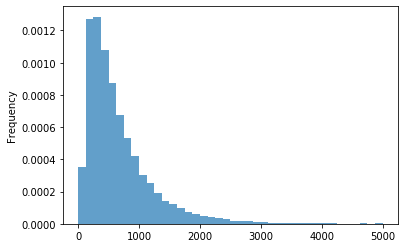

In [25]:
plt.xlabel('')
plt.ylabel('Frequency')
#plt.ylim(ymax=50000,ymin=0)
#plt.xlim(xmax=len(text2)+1,xmin=0)
#plt.ylim(ymax=6000,ymin=0)
plt.hist(length_review2, bins=40,alpha=0.7,density = True)
plt.show()

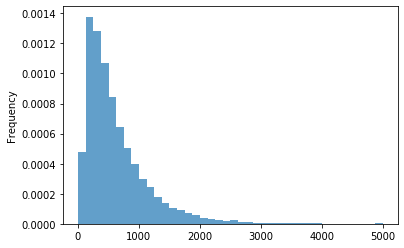

In [26]:
plt.xlabel('')
plt.ylabel('Frequency')
#plt.ylim(ymax=50000,ymin=0)
#plt.xlim(xmax=len(text2)+1,xmin=0)
#plt.ylim(ymax=6000,ymin=0)
plt.hist(length_review3, bins=40,alpha=0.7, density = True)
plt.show()

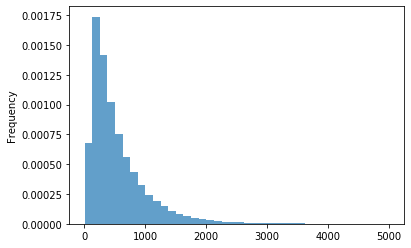

In [27]:
plt.xlabel('')
plt.ylabel('Frequency')
#plt.ylim(ymax=50000,ymin=0)
#plt.xlim(xmax=len(text2)+1,xmin=0)
#plt.ylim(ymax=6000,ymin=0)
plt.hist(length_review4, bins=40,alpha=0.7, density = True)
plt.show()

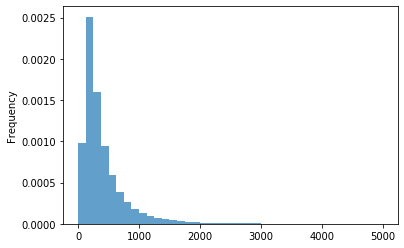

In [28]:
plt.xlabel('')
plt.ylabel('Frequency')
#plt.ylim(ymax=50000,ymin=0)
#plt.xlim(xmax=len(text2)+1,xmin=0)
#plt.ylim(ymax=6000,ymin=0)
plt.hist(length_review5, bins=40,alpha=0.7, density = True)
plt.show()

In [29]:
info.head()

,business_id,name,city,latitude,longitude,star,review_count
0,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,Phoenix,33.495194,-112.028588,3.0,18
1,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,Las Vegas,36.195615,-115.040529,4.5,184
2,NPHZkn1e-tSJAbo8Zm9rYw,Burrito Bandidos,Toronto,43.666181,-79.316468,3.5,43
3,voZnDQs6Hs3YpNcS-9TALg,New Mexican Grill,Chandler,33.261325,-111.790815,4.0,84
4,jScBTQtdAt-8RshaiBEHgw,Served,Henderson,36.010745,-115.064803,4.5,664


In [30]:
city = info.groupby("city")
city.head()

,business_id,name,city,latitude,longitude,star,review_count
0,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,Phoenix,33.495194,-112.028588,3.0,18
1,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,Las Vegas,36.195615,-115.040529,4.5,184
2,NPHZkn1e-tSJAbo8Zm9rYw,Burrito Bandidos,Toronto,43.666181,-79.316468,3.5,43
3,voZnDQs6Hs3YpNcS-9TALg,New Mexican Grill,Chandler,33.261325,-111.790815,4.0,84
4,jScBTQtdAt-8RshaiBEHgw,Served,Henderson,36.010745,-115.064803,4.5,664
...,...,...,...,...,...,...,...
4551,7rTkeIRgR5CENyQ3hNOT5w,Mucho Burrito,Brossard,45.439600,-73.443186,2.0,6
4576,Tx_cnDj5M0WTzmFB4tfDgg,El Chile Bravo,Twinsburg,41.340955,-81.417715,3.5,35
4585,I0PbVOZW3uHBQwUsoiT4Sw,El Patron's,Wadsworth,41.053723,-81.725871,4.0,25
4603,D4YDe_3JihDEPUosO5nH-A,QDOBA Mexican Eats,Shaker Heights,41.465461,-81.538775,3.0,14


In [31]:
city.mean().sort_values(by="star",ascending=False).head()

,latitude,longitude,star,review_count
city,,,,
Salaberry-de-Valleyfield,45.253616,-74.135464,5.0,6.0
Lake Park,35.084835,-80.634331,5.0,3.0
York,43.690704,-79.473745,4.5,93.0
DeForest,43.246589,-89.341939,4.5,78.0
Spring Valley,36.129184,-115.092329,4.5,4.0


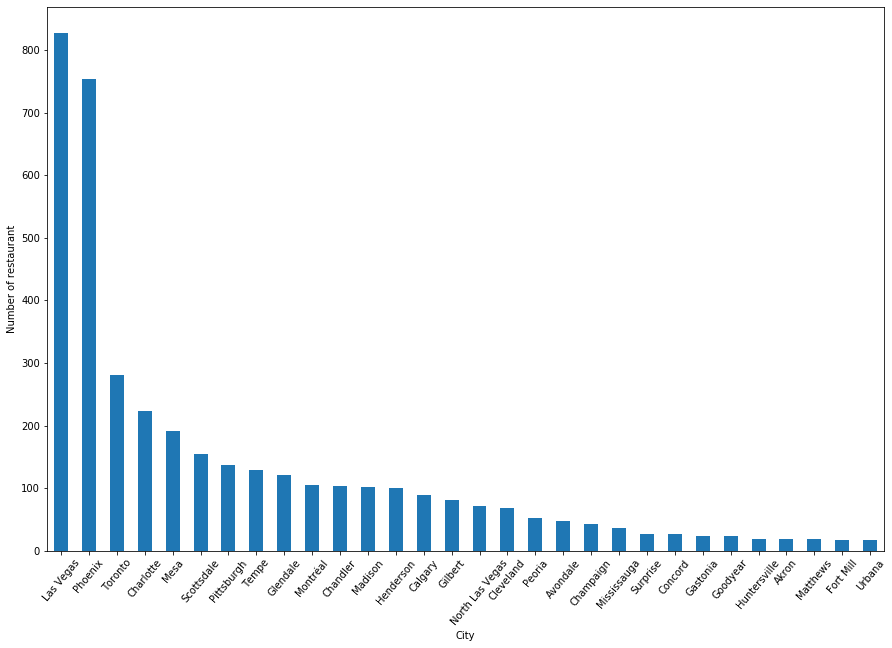

<Figure size 432x288 with 0 Axes>

In [59]:
plt.figure(figsize=(15,10))
city.size().sort_values(ascending=False)[:30].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("City")
plt.ylabel("Number of restaurant")
plt.show()
plt.savefig("Yelp_Review/city_NumRes.png")

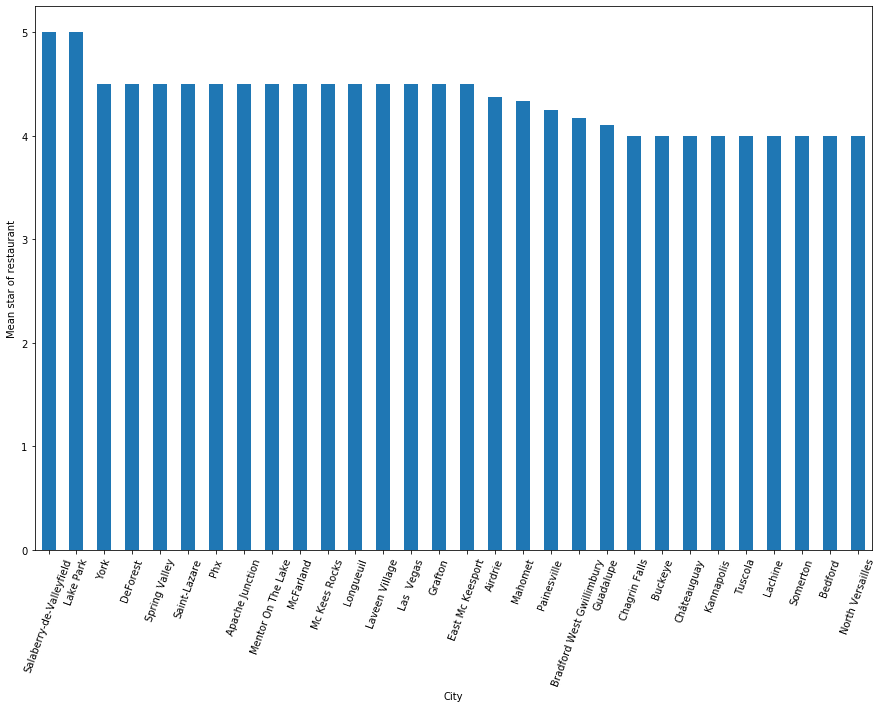

In [53]:
plt.figure(figsize=(15,10))
city.mean().sort_values(by="star",ascending=False)["star"][:30].plot.bar()
plt.xticks(rotation=70)
plt.xlabel("City")
plt.ylabel("Mean star of restaurant")
plt.show()

In [0]:
label_star = ['Las Vegas','Phoenix','Toronto','Charlotte','Mesa','Scottsdale','Pittsburgh','Tempe','Glendale','Montréal',
             'Chandler','Madison','Henderson','Calgary','Gilbert','North Las Vegas','Cleveland','Peoria','Avondale','Champaign',
             'Mississauga','Surprise','Concord','Gastonia','Goodyear','Huntersville','Matthews','Akron','Fort Mill','Urbana']

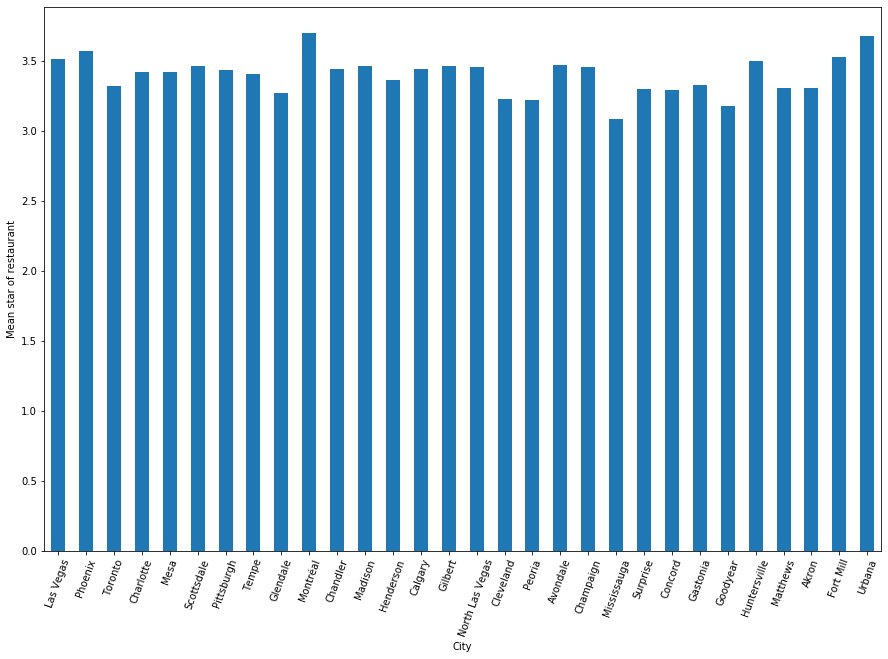

<Figure size 432x288 with 0 Axes>

In [58]:
plt.figure(figsize=(15,10))
city.mean().sort_values(by="star",ascending=False)["star"][label_star].plot.bar()
plt.xticks(rotation=70)
plt.xlabel("City")
plt.ylabel("Mean star of restaurant")
plt.show()
plt.savefig("Yelp_Review/city_MeanStar.png")

In [45]:
len(info)

4618

In [46]:
info_dec = info.sort_values(by = "review_count", ascending=False)
info_dec[:10]

,business_id,name,city,latitude,longitude,star,review_count
1155,XZbuPXdyA0ZtTu3AzqtQhg,Mesa Grill,Las Vegas,36.117125,-115.174793,4.0,3268
1587,RwMLuOkImBIqqYj4SSKSPg,Tacos El Gordo,Las Vegas,36.131594,-115.164767,4.0,3243
3394,JDZ6_yycNQFTpUZzLIKHUg,El Dorado Cantina,Las Vegas,36.134915,-115.175822,4.5,2623
1323,QXV3L_QFGj8r6nWX2kS2hA,Nacho Daddy,Las Vegas,36.108086,-115.171111,4.5,2400
3223,frCxZS7lPhEnQRJ3UY6m7A,La Santisima,Phoenix,33.469201,-112.047381,4.0,1967
3140,K-uQkfSUTwu5LIwPB4b_vg,The Mission Old Town,Scottsdale,33.492287,-111.924273,4.0,1905
251,SVGApDPNdpFlEjwRQThCxA,Juan's Flaming Fajitas & Cantina,Las Vegas,36.100509,-115.302689,4.5,1624
438,d_L-rfS1vT3JMzgCUGtiow,Border Grill,Las Vegas,36.090067,-115.176973,4.0,1623
2449,GJ_bXUPv672YwNg4TneJog,China Poblano,Las Vegas,36.109946,-115.175391,3.5,1620
373,cHdJXLlKNWixBXpDwEGb_A,Chino Bandido,Phoenix,33.626831,-112.100300,4.0,1600


In [47]:
len(info[info_dec["city"]=='Las Vegas'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


827

In [48]:
city_count = pd.value_counts(info_dec["city"])
print(city_count[:30])

Las Vegas          827
Phoenix            753
Toronto            280
Charlotte          224
Mesa               191
Scottsdale         154
Pittsburgh         137
Tempe              129
Glendale           121
Montréal           105
Chandler           103
Madison            102
Henderson          101
Calgary             89
Gilbert             81
North Las Vegas     72
Cleveland           69
Peoria              53
Avondale            47
Champaign           42
Mississauga         37
Surprise            27
Concord             26
Gastonia            23
Goodyear            23
Huntersville        19
Matthews            18
Akron               18
Fort Mill           17
Urbana              17
Name: city, dtype: int64


<BarContainer object of 10 artists>

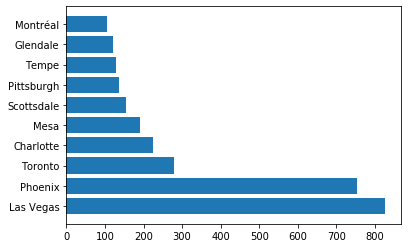

In [0]:

lab = ['Las Vegas','Phoenix','Toronto','Charlotte','Mesa','Scottsdale','Pittsburgh','Tempe','Glendale','Montréal']     
plt.barh(range(len(city_count[:10])), city_count[:10],tick_label=lab)

In [242]:
info_lv = info[info_dec["city"]=='Las Vegas']
info_lv[:20]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,business_id,name,city,latitude,longitude,star,review_count
1,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,Las Vegas,36.195615,-115.040529,4.5,184
15,dusNIzdCaH6EoLl2hRy6cQ,Chipotle Mexican Grill,Las Vegas,36.120095,-115.171769,3.5,115
22,H2Chxto2e6dHTDJ8-s3-pQ,Roberto's Taco Shop,Las Vegas,36.141080,-115.119311,3.0,64
32,VR2LTEsJByan97fcYRkl5w,Mariscos El Mariachi,Las Vegas,36.172198,-115.115679,3.0,33
34,N4r3XX7uH42aXhHvFMkxjA,Las Tapatias,Las Vegas,36.159262,-115.225006,3.0,3
37,BIbjBxoiJLS8CnNsSP64TQ,360 Gourmet Burrito,Las Vegas,36.082854,-115.151203,2.0,168
43,G1lB2bUf1MT1FZT8TBy62g,Rubalcabas Taco Shop,Las Vegas,36.195889,-115.060361,4.5,54
46,Kbidfh24_7-a380tovQeYA,Bahía Centroamerica Restaurant,Las Vegas,36.159578,-115.208656,3.5,34
50,XDYCIRENiT2doRZgwNJ3SA,Pepe's Tacos,Las Vegas,36.112546,-115.242615,2.5,218
51,hySFMXFqyb7rNuxS8koNrQ,Taco Bell,Las Vegas,36.002320,-115.207770,2.5,39


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([0.00665054, 0.03657799, 0.10973398, 0.        , 0.3092503 ,
        0.51541717, 0.66172914, 0.        , 0.60519952, 0.39570738,
        0.10973398]),
 array([1.        , 1.36363636, 1.72727273, 2.09090909, 2.45454545,
        2.81818182, 3.18181818, 3.54545455, 3.90909091, 4.27272727,
        4.63636364, 5.        ]),
 <a list of 11 Patch objects>)

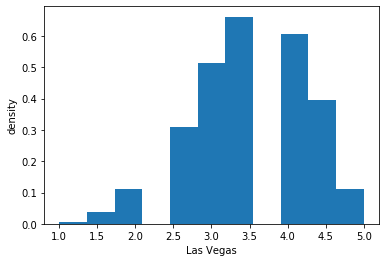

In [0]:
plt.xlabel('Las Vegas')
plt.ylabel('density')
plt.hist(info_lv['star'],normed = 1,bins = 11)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([2.77761832e-03, 1.77767573e-04, 3.70349110e-05, 2.96279288e-05,
        2.59244377e-05, 0.00000000e+00, 0.00000000e+00, 3.70349110e-06,
        3.70349110e-06, 7.40698219e-06]),
 array([3.0000e+00, 3.2950e+02, 6.5600e+02, 9.8250e+02, 1.3090e+03,
        1.6355e+03, 1.9620e+03, 2.2885e+03, 2.6150e+03, 2.9415e+03,
        3.2680e+03]),
 <a list of 10 Patch objects>)

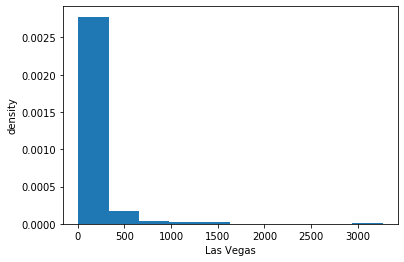

In [0]:
plt.xlabel('Las Vegas')
plt.ylabel('density')
plt.hist(info_lv['review_count'],normed = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


(array([0.01095618, 0.02556441, 0.12051793, 0.        , 0.23373174,
        0.57702523, 0.50398406, 0.        , 0.70484728, 0.47841965,
        0.09495352]),
 array([1.        , 1.36363636, 1.72727273, 2.09090909, 2.45454545,
        2.81818182, 3.18181818, 3.54545455, 3.90909091, 4.27272727,
        4.63636364, 5.        ]),
 <a list of 11 Patch objects>)

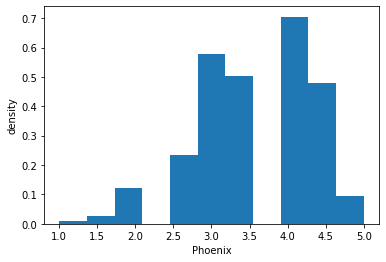

In [0]:
info_ph = info[info_dec["city"]=='Phoenix']
plt.xlabel('Phoenix')
plt.ylabel('density')
plt.hist(info_ph['star'],normed = 1,bins = 11)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([4.38842052e-03, 4.12470958e-04, 1.62283656e-04, 4.73327329e-05,
        4.05709139e-05, 6.76181898e-06, 6.76181898e-06, 1.35236380e-05,
        6.76181898e-06, 6.76181898e-06]),
 array([   3. ,  199.4,  395.8,  592.2,  788.6,  985. , 1181.4, 1377.8,
        1574.2, 1770.6, 1967. ]),
 <a list of 10 Patch objects>)

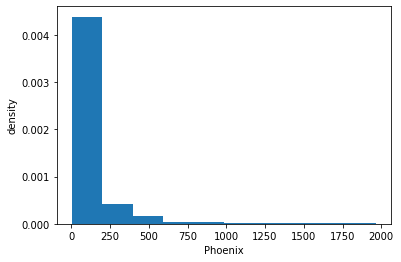

In [0]:
plt.xlabel('Phoenix')
plt.ylabel('density')
plt.hist(info_ph['review_count'],normed = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


(array([0.00982143, 0.01964286, 0.1375    , 0.        , 0.47142857,
        0.56964286, 0.70714286, 0.        , 0.62857143, 0.16696429,
        0.03928571]),
 array([1.        , 1.36363636, 1.72727273, 2.09090909, 2.45454545,
        2.81818182, 3.18181818, 3.54545455, 3.90909091, 4.27272727,
        4.63636364, 5.        ]),
 <a list of 11 Patch objects>)

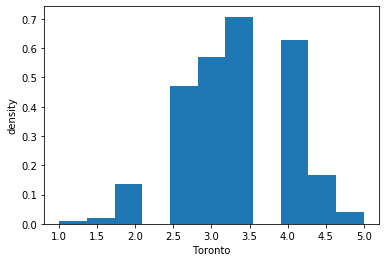

In [0]:
info_tor = info[info_dec["city"]=='Toronto']
plt.xlabel('Toronto')
plt.ylabel('density')
plt.hist(info_tor['star'],normed = 1,bins = 11)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([8.30846699e-03, 6.83824444e-04, 2.05147333e-04, 1.70956111e-04,
        1.02573667e-04, 0.00000000e+00, 3.41912222e-05, 3.41912222e-05,
        0.00000000e+00, 0.00000000e+00, 3.41912222e-05]),
 array([   3.        ,  107.45454545,  211.90909091,  316.36363636,
         420.81818182,  525.27272727,  629.72727273,  734.18181818,
         838.63636364,  943.09090909, 1047.54545455, 1152.        ]),
 <a list of 11 Patch objects>)

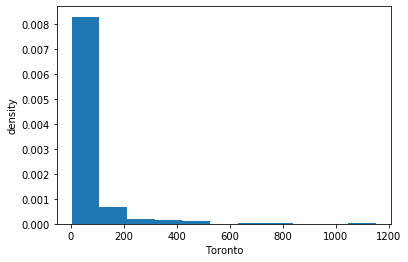

In [0]:
plt.xlabel('Toronto')
plt.ylabel('density')
plt.hist(info_tor['review_count'],normed = 1,bins = 11)

## NLP

In [243]:
from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive')

! pip install nltk
nltk.download("stopwords")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
! pip install bs4

In [0]:
! pip install wordcloud

In [0]:
! pip install jieba

In [244]:
os.chdir(path)
os.listdir(path)

['回归分析方法及其在实验研究与设计中的应用.gslides',
 'Colab Notebooks',
 'STAT628_module2.gslides',
 'Yelp_Review']

In [0]:
import nltk
#import urllib.request
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import jieba
#import PIL.Image as image
from nltk.corpus import stopwords

In [246]:
Maria_1_review = review2['text'][review2['business_id']=="XZbuPXdyA0ZtTu3AzqtQhg"]
Maria_1_review.head()

82855    Absolutely wonderful! I've been to Mesa Grill ...
82858    Service - server was very nice and had good re...
82873    The food was good. The wait, even with reserva...
82878    When in Vegas GO HERE! Bobby Flay's Mesa Grill...
82880    Dined here with the family during our last vis...
Name: text, dtype: object

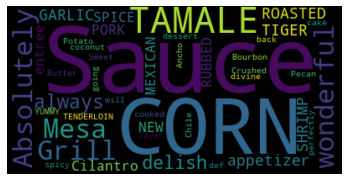

In [247]:

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(Maria_1_review[82855])

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [248]:
res1ALL = " ".join(review for review in Maria_1_review)
print ("There are {} words in the combination of all review.".format(len(res1ALL)))

There are 2656693 words in the combination of all review.


In [249]:
import io 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [250]:
from nltk.tokenize import sent_tokenize
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [251]:

tokenized_text=sent_tokenize(res1ALL)
print(tokenized_text)

['Absolutely wonderful!', "I've been to Mesa Grill before, it always is delish!", 'As an appetizer i had the TIGER SHRIMP + ROASTED GARLIC CORN TAMALE * Corn - Cilantro Sauce.', 'Then for an entree, NEW MEXICAN SPICE RUBBED PORK TENDERLOIN * Bourbon - Ancho Chile Sauce Sweet Potato Tamale + Crushed Pecan Butter.', 'It was divine!!!', 'It was cooked perfectly and the sauce was spicy, just like I like it!', 'For dessert, I had the coconut layer cake - YUMMY!', 'I will def be going back!', 'Service - server was very nice and had good recommendation \n\nFood - great food!', 'Started with their signature cactus mageritas.', "Wasn't very Hungary so went with two appetizers, the shrimp cocktail and ahi tuna nachos.", 'The portions were small yet food was served pretty fast and very tasty.', 'Will come again The food was good.', 'The wait, even with reservations, was disgustingly long.', "But realistically thats kind of what I expected being as it's a restaurant owned by a Food Network Chef.",

In [0]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(res1ALL)
#print(tokenized_word)

In [253]:
stop_words=set(stopwords.words("english"))
print(stop_words)

filtered_word=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_word.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_word)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [254]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_word:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_word)
print("Stemmed Sentence:",stemmed_words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [255]:
stemmed_words[:5]

['absolut', 'wonder', '!', 'I', "'ve"]

In [256]:
from nltk.probability import FreqDist
fdist = FreqDist(stemmed_words)
print(fdist)

<FreqDist with 10920 samples and 358519 outcomes>


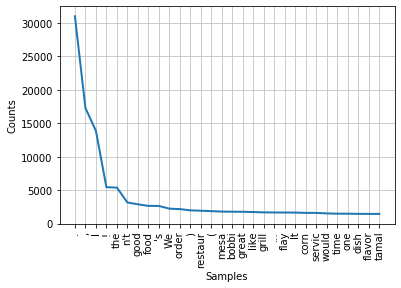

In [257]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [0]:
newtext=[]
for word in stemmed_words:
  newtext.append(' ')
  newtext.append(word)

In [266]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [267]:
stopwords.words('english')

AttributeError: ignored

In [0]:
res1 = " ".join(word for word in stemmed_words)

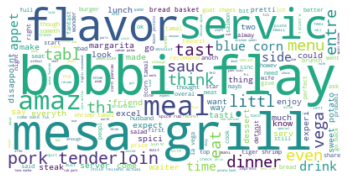

In [290]:
# Create stopword list:
#stopwords = set(stopwords.words('english'))

stopwords.update(["food", "now", "restaur", "really", "place", "dish", "order","one","would", "also", "got", "good", "great", "like", "love", "delici", "came", "get", "nice"
                 , "well", "us", "best","n't", "tri","realli"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(res1)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

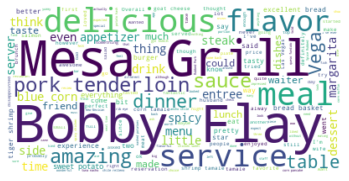

In [287]:
# Create stopword list:
#stopwords = set(stopwords.words('english'))

stopwords.update(["food", "now", "restaurant", "really", "place", "dish", "ordered"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(res1ALL)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()